In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Loading Dataset

In [2]:
df = pd.read_csv("D:/datasets/fuel_efficiency_detection/auto-mpg.csv")

In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Data Cleaning

We can see that dataset contains character values in 'car name' column. So, we have to remove this column from dataset using pandas drop method.

In [6]:
df = df.drop(['car name'], axis = 1)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**Removing null values in the dataset**

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

# Data Analysis

**corelation matric for features**

C:\Users\kshit\AppData\Local\Temp\ipykernel_1400\314223404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


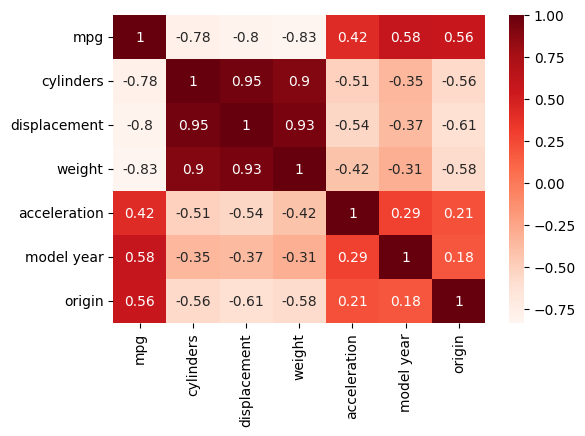

In [10]:
plt.figure(figsize=(6,4))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

**Relating with output variable**

In [11]:
#Correlation with output variable
cor_target = abs(cor['mpg'])

#Selecting highly correlated features
relavent_features = cor_target[cor_target>0.5]
relavent_features

mpg             1.000000
cylinders       0.775396
displacement    0.804203
weight          0.831741
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

The "Origin" column is really categorical, not numeric. So - 

**Convert that to a one-hot**

In [12]:
origin = df.pop('origin')

In [13]:
df['USA'] = (origin==1)*1.0
df['Europe'] = (origin==2)*1.0
df['Japan'] = (origin==3)*1.0

In [14]:
df['horsepower'] = df['horsepower'].replace(to_replace = '?', value =105)
df['horsepower'] = df['horsepower'].astype(float)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,0.0,0.0


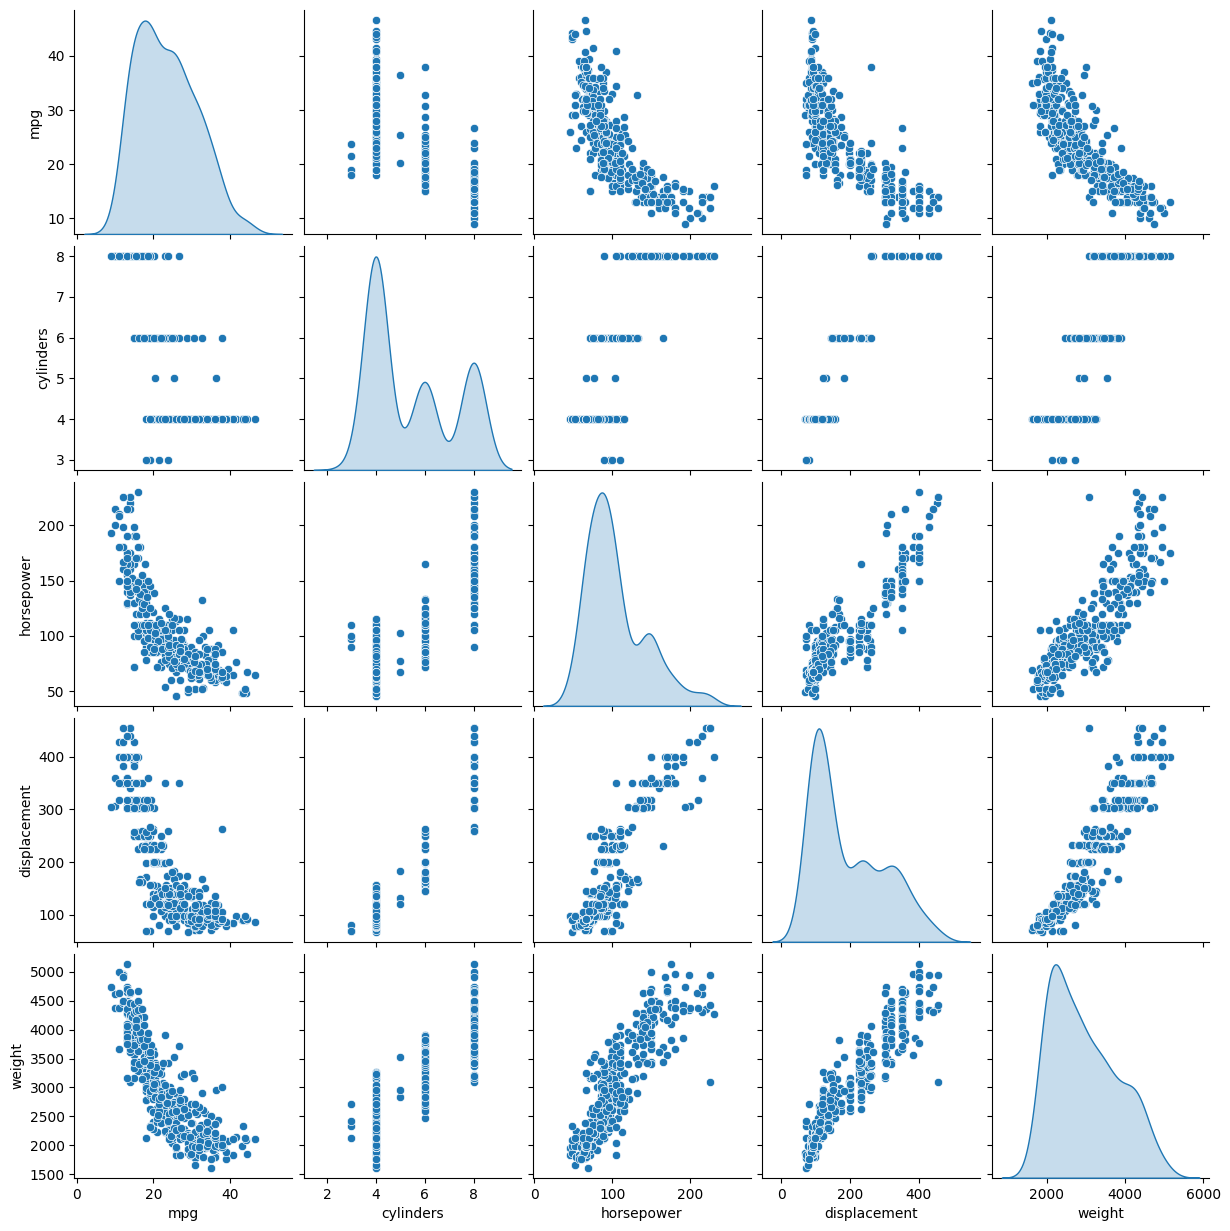

In [32]:
sns.pairplot(df[["mpg", "cylinders","horsepower", "displacement", "weight"]], diag_kind="kde")

In [27]:
df_stats = df.describe()
df_stats.pop("mpg")
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.477387,38.199242,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
USA,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
Europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
Japan,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [29]:
X = df.drop(['mpg'], axis = 1)
Y = df['mpg']

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=10, test_size=0.2, shuffle=True)

In [34]:
X_train.shape

(318, 9)

In [35]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
303,4,85.0,65.0,2020,19.2,79,0.0,0.0,1.0
347,4,85.0,65.0,1975,19.4,81,0.0,0.0,1.0
149,4,120.0,97.0,2489,15.0,74,0.0,0.0,1.0
100,6,250.0,88.0,3021,16.5,73,1.0,0.0,0.0
175,4,90.0,70.0,1937,14.0,75,0.0,1.0,0.0


In [36]:
Y_train.shape

(318,)

# Loading Model to make Prediction

## lightgbm model

In [38]:
import lightgbm as lgb

#### Building the model

In [40]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

#### Loading Data

In [41]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_test = lgb.Dataset(X_test, Y_test)

#### Fit the model Using training dataset

In [42]:
model1 = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_test,
                  early_stopping_rounds=50)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 51.2169	valid_0's l1: 6.02569
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 42.8875	valid_0's l1: 5.47208
[3]	valid_0's l2: 36.3846	valid_0's l1: 4.9916
[4]	valid_0's l2: 30.8799	valid_0's l1: 4.55334
[5]	valid_0's l2: 26.0557	valid_0's l1: 4.14178
[6]	valid_0's l2: 22.51	valid_0's l1: 3.83761
[7]	valid_0's l2: 19.631	valid_0's l1: 3.55343
[8]	valid_0's l2: 17.0105	valid_0's l1: 3.2666
[9]	valid_0's l2: 15.2441	valid_0's l1: 3.06476
[10]	valid_0's l2: 13.7179	valid_0's l1: 2.88228
[11]	valid_0's l2: 12.6141	valid_0's l1: 2.75135
[12]	valid_0's l2: 11.7395	valid_0's l1: 2.64718
[13]	valid_0's l2: 10.9539	valid_0's l1: 2.54565
[14]	valid_0's l2: 10.3067	valid_0's l1: 2.47033
[15]	valid_0's l2: 9.81338	valid_0's l1: 2.40809
[16]	valid_0's l2: 9.47483	valid_0's l1: 2.36082
[17]	valid_0's l2: 9.15844	valid_0's l1: 2.3265
[18]	valid_0's l2: 8.97987	valid_0's l1: 2.28878
[19]	valid_0's l2:

C:\Users\kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


#### Predicting test dataset

In [43]:
Y_pred1 = model1.predict(X_test)
# accuracy check
mse1 = mean_squared_error(Y_test, Y_pred1)
rmse1 = mse1**(0.5)
print("MSE1: %.2f" % mse1)
print("RMSE1: %.2f" % rmse1) 

MSE1: 8.34
RMSE1: 2.89


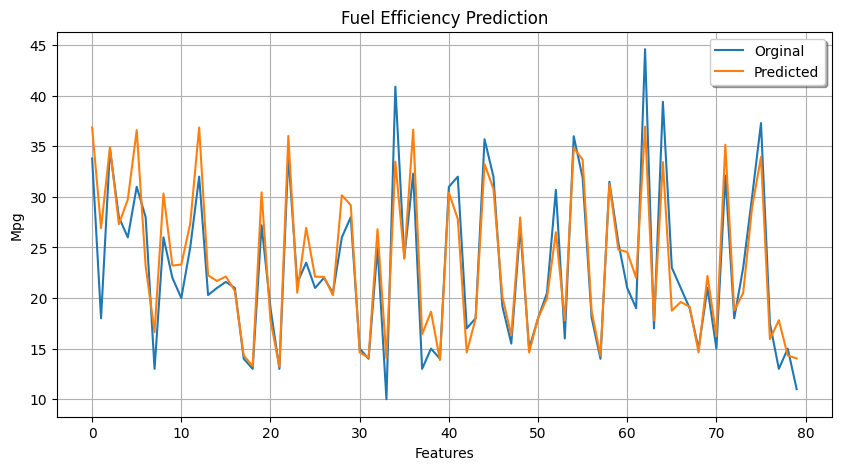

In [44]:
x_as = range(len(Y_test))
plt.figure(figsize=(10,5))
plt.plot(x_as, Y_test, label='Orginal')
plt.plot(x_as, Y_pred1, label='Predicted')
plt.title('Fuel Efficiency Prediction')
plt.xlabel('Features')
plt.ylabel('Mpg')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Plot feature importane of lightgbm

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

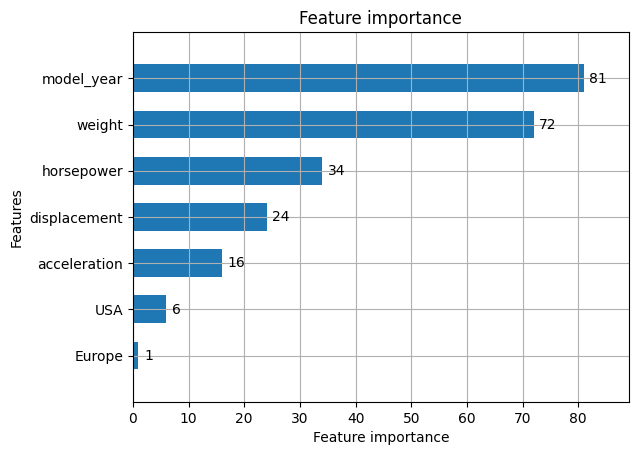

In [45]:
lgb.plot_importance(model1, height=0.6)

#### Visualizing in plot

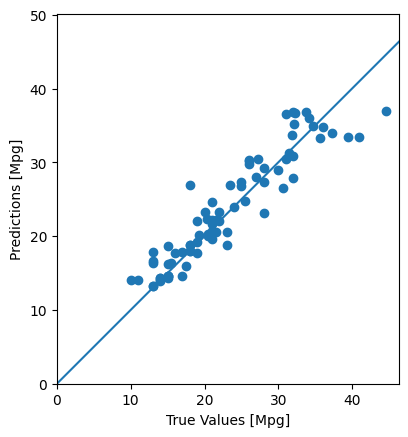

In [46]:
plt.scatter(Y_test, Y_pred1)
plt.xlabel('True Values [Mpg]')
plt.ylabel('Predictions [Mpg]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

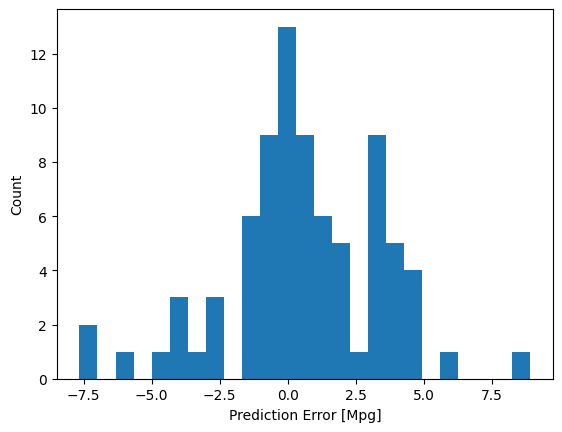

In [47]:
error = Y_pred1 - Y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Mpg]")
_ = plt.ylabel("Count")

## XGBregressor Model

In [48]:
import xgboost as xgb
from xgboost import plot_importance

In [49]:
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
model2.fit(X_train, Y_train, 
            eval_set=[(X_train, Y_train), (X_test, Y_test)], 
            early_stopping_rounds=50) 

[0]	validation_0-rmse:22.07058	validation_1-rmse:21.56711
[1]	validation_0-rmse:19.96036	validation_1-rmse:19.45357
[2]	validation_0-rmse:18.05661	validation_1-rmse:17.56137
[3]	validation_0-rmse:16.33844	validation_1-rmse:15.83148
[4]	validation_0-rmse:14.79255	validation_1-rmse:14.28018
[5]	validation_0-rmse:13.40198	validation_1-rmse:12.88934
[6]	validation_0-rmse:12.15456	validation_1-rmse:11.68991
[7]	validation_0-rmse:11.02742	validation_1-rmse:10.57095
[8]	validation_0-rmse:10.01234	validation_1-rmse:9.58037
[9]	validation_0-rmse:9.09865	validation_1-rmse:8.67439
[10]	validation_0-rmse:8.27837	validation_1-rmse:7.92317
[11]	validation_0-rmse:7.54034	validation_1-rmse:7.18336
[12]	validation_0-rmse:6.88014	validation_1-rmse:6.59136
[13]	validation_0-rmse:6.28499	validation_1-rmse:6.00407
[14]	validation_0-rmse:5.75269	validation_1-rmse:5.54299
[15]	validation_0-rmse:5.26965	validation_1-rmse:5.12071
[16]	validation_0-rmse:4.83837	validation_1-rmse:4.78264
[17]	validation_0-rmse:4

C:\Users\kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-rmse:0.64198	validation_1-rmse:3.08373
[72]	validation_0-rmse:0.63842	validation_1-rmse:3.08352
[73]	validation_0-rmse:0.63251	validation_1-rmse:3.07970
[74]	validation_0-rmse:0.62492	validation_1-rmse:3.08528
[75]	validation_0-rmse:0.62051	validation_1-rmse:3.08619
[76]	validation_0-rmse:0.61690	validation_1-rmse:3.09111
[77]	validation_0-rmse:0.61356	validation_1-rmse:3.09021
[78]	validation_0-rmse:0.60781	validation_1-rmse:3.08981
[79]	validation_0-rmse:0.59999	validation_1-rmse:3.08895
[80]	validation_0-rmse:0.59580	validation_1-rmse:3.08944
[81]	validation_0-rmse:0.58756	validation_1-rmse:3.08750


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### After training the model, we'll check the model training score

In [50]:
score = model2.score(X_train, Y_train)  
print("Training score of XGBregressor: ", score)

Training score of XGBregressor:  0.9607632382968502


#### We can also apply the cross-validation method to evaluate the training score

In [51]:
scores = cross_val_score(model2, X_train, Y_train,cv=10)
print("Mean cross-validation score of XGBregressor: %.2f" % scores.mean())

Mean cross-validation score of XGBregressor: 0.87


#### Or if you want to use the KFlold method in cross-validation it goes as below

In [52]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model2, X_train, Y_train, cv=kfold )
print("K-fold CV average score of XGBregressor: %.2f" % kf_cv_scores.mean())

K-fold CV average score of XGBregressor: 0.86


#### Test dataset prediction and MSE and RMSE calculation

In [53]:
Y_pred2 = model2.predict(X_test)
# accuracy check
mse2 = mean_squared_error(Y_test, Y_pred2)
print("MSE: %.2f" % mse2)
rmse2 = mse2**(0.5)
print("RMSE2: %.2f" % rmse2) 

MSE: 9.11
RMSE2: 3.02


#### Finally, we'll visualize the original and predicted test data in a plot to compare visually

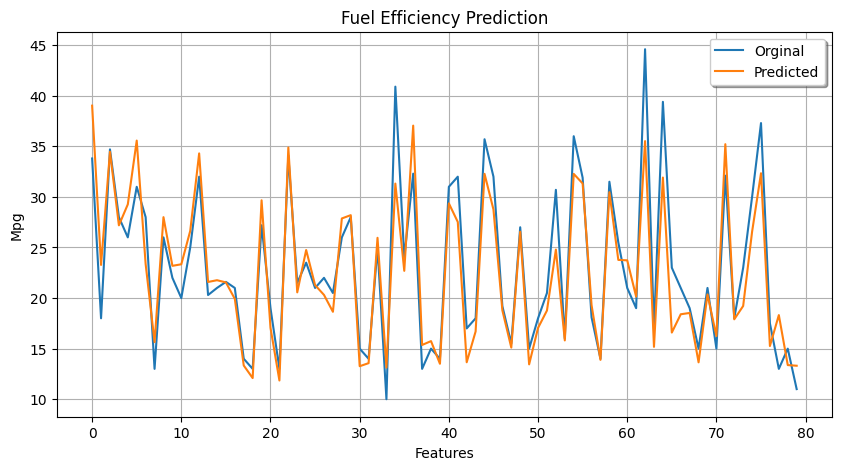

In [54]:
x_as = range(len(Y_test))
plt.figure(figsize=(10,5))
plt.plot(x_as, Y_test, label='Orginal')
plt.plot(x_as, Y_pred2, label='Predicted')
plt.title('Fuel Efficiency Prediction')
plt.xlabel('Features')
plt.ylabel('Mpg')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Plot feature importance of XGBregressor

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

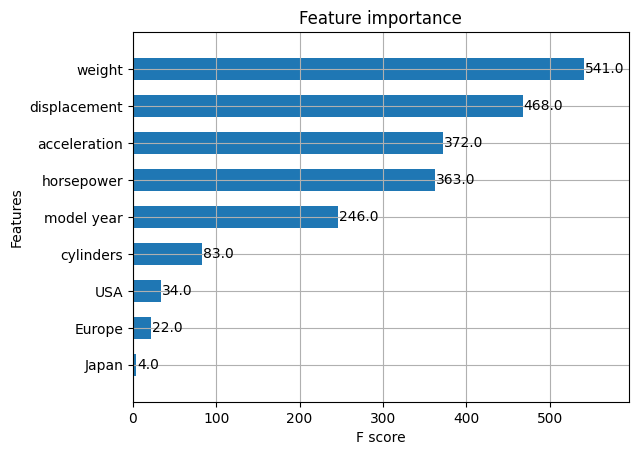

In [55]:
plot_importance(model2, height=0.6)

#### Lightgbm gives less RSME score than XGBregressor.

#### Visualizing in plot

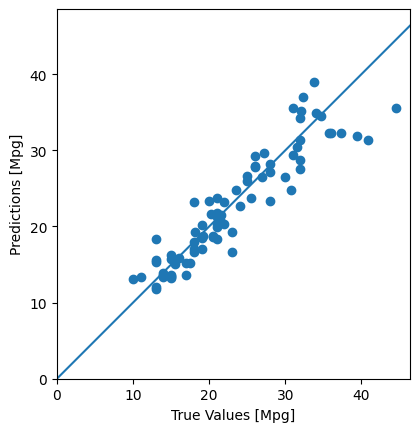

In [56]:
plt.scatter(Y_test, Y_pred2)
plt.xlabel('True Values [Mpg]')
plt.ylabel('Predictions [Mpg]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

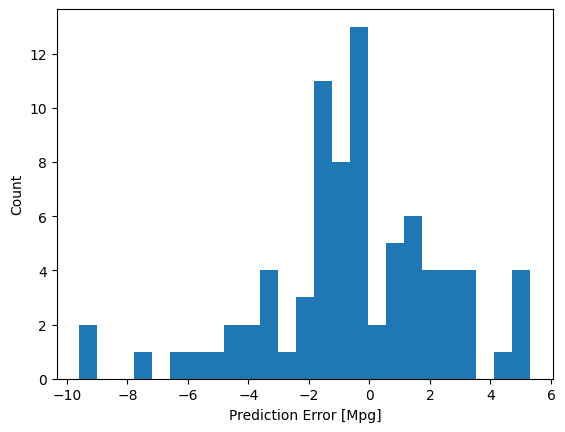

In [57]:
error = Y_pred2 - Y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Mpg]")
_ = plt.ylabel("Count")

Conclusion

From the above model training using "lightgbm" and "XGBregressor" models I found that lightgbm model has less RSME(Root Mean Squared Error) = 2.89 than XGBregressor model RSME = 3.02.